<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Property Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Summary Statistics](#Summary_Statistics)
        - 4.1.3 - [Distribution of Variables](#distribution_variables)
        - 4.1.4 - [Discover Outliers](#outlier)
        - 4.1.5 - [Missing Values](#Missing_Values)
        - 4.1.6 - [Correlation](#correlation)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#cat_num)
    - 4.2 - [Prepare the Data](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [Dummy Encode the Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Feature Engineering](#Feature_Engineering)
      - 5.3.1 - [Multiple Linear Regression (Using New Feature1) - Full Model (OLS)](#feature1)
      - 5.3.2 - [Multiple Linear Regression (Using New Feature2) - Full Model (OLS)](#feature2)
6. **[Feature Selection](#feature_selection)**
     - 6.1 - [Variance Inflation Factor](#vif)
     - 6.2 - [Forward Selection](#forward)
     - 6.3 - [Backward Elimination](#backward)
     - 6.4 - [Recursive Feature Elimination (RFE)](#rfe)
7. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# read csv file using pandas
df_house = pd.read_csv('HousePrices.csv')

# display the top 5 rows of the dataframe
df_house.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Lets take a glance at our dataframe and see how it looks

#### Dimensions of the data

In [5]:
# 'shape' function gives the total number of rows and columns in the data
df_house.shape

(1460, 81)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [6]:
# 'dtypes' gives the data type for each column
df_house.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, we see that the data type of 'Dwell_Type', 'OverallQual' and 'OverallCond' is 'int64'.<br>

But according to data definition, 'Dwell_Type ', 'OverallQual' and 'OverallCond' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


#### Let us remove the Id column as this will not be necessary for our analysis

In [7]:
df_house.drop(['Id'], axis=1, inplace=True)

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for categorical variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [8]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_house.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br><br> 
    The LotFrontage ranges from 21 feet to 313 feet, with mean 70 feet. It can be seen that the oldest house was built in 1872 and the recent house built was in 2010. <br><br>Note that the minimum pool area is 0 sq.ft. From this we can infer that not all houses have pools and yet have been considered to calculate the mean pool area. Also the count for LotFrontage is less than the total number of observations which indicates the presence of missing values. We deal with the missing data in section 4.1.4 
    </b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical features, use the describe(include=object)**

In [9]:
# summary of categorical variables
df_house.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frquency.:<br><br> 
                        We will understand the outputs of the above table using variable 'MSZoning' <br> 
                        count: Number of observations i.e., 1460 <br> 
                        unique: Number of unique values or classes in the variable. i.e., it has 5 classes in it.<br>  
                        top: The most occurring class, in this variable it is RL (Residential Low Density) <br>
                        frequency: Frequency of the most repeated class; out of 1460 observations RL has a frequency of 1151 <br> Also some of the variables have count less than total number of observations which indicates the presence of missing values. We deal with the missing data in section 4.1.4 </b>  
                </font>
            </div>
        </td>
    </tr>
</table>

As, `PoolQC` have only 7 non-zero values out of 1460 observations. And, the variable `PoolArea` contains the area of these 7 pools; thus, we remove the variables `PoolQC` and `PoolArea`.

In [10]:
# use drop() to drop the redundant variables
# 'axis = 1' drops the corresponding columns
df_house = df_house.drop(['PoolQC', 'PoolArea'], axis= 1)

# re-check the shape of the dataframe
df_house.shape

(1460, 78)

<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric variables<br>
                        2. Distribution of categoric variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Distribution of numeric variables**

we plot the histogram to check the distribution of the variables.

In [11]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Property_Sale_Price'],
      dtype='object')

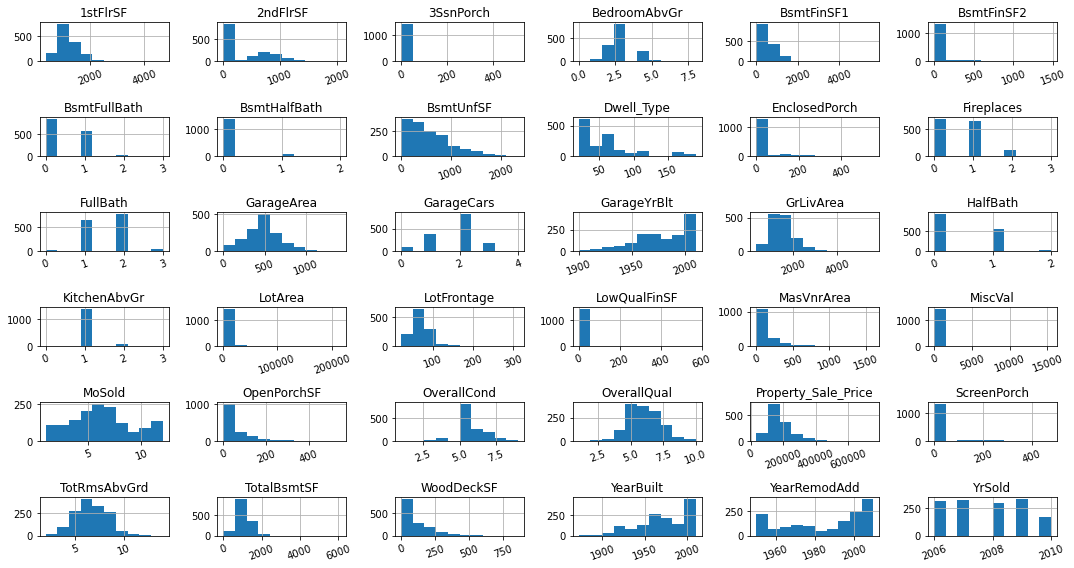

In [12]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df_house.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

#### Visualize the target variable

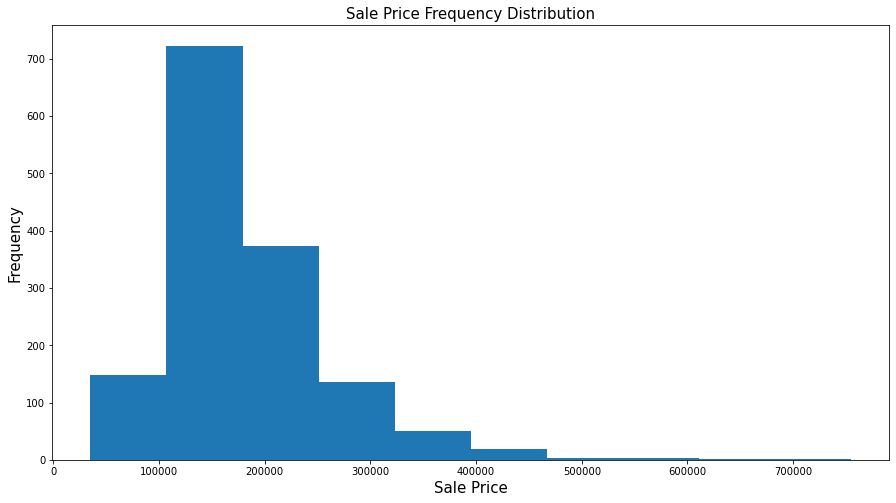

In [13]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_house["Property_Sale_Price"])
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that the target variable 'Property_Sale_Price' is positively skewed. 
                    </b>   
                </font>
            </div>
        </td>
    </tr>
</table>



**2. Distribution of categoric variables.**

For the categoric variables, we plot the countplot to check the distribution of the each category in the variable.

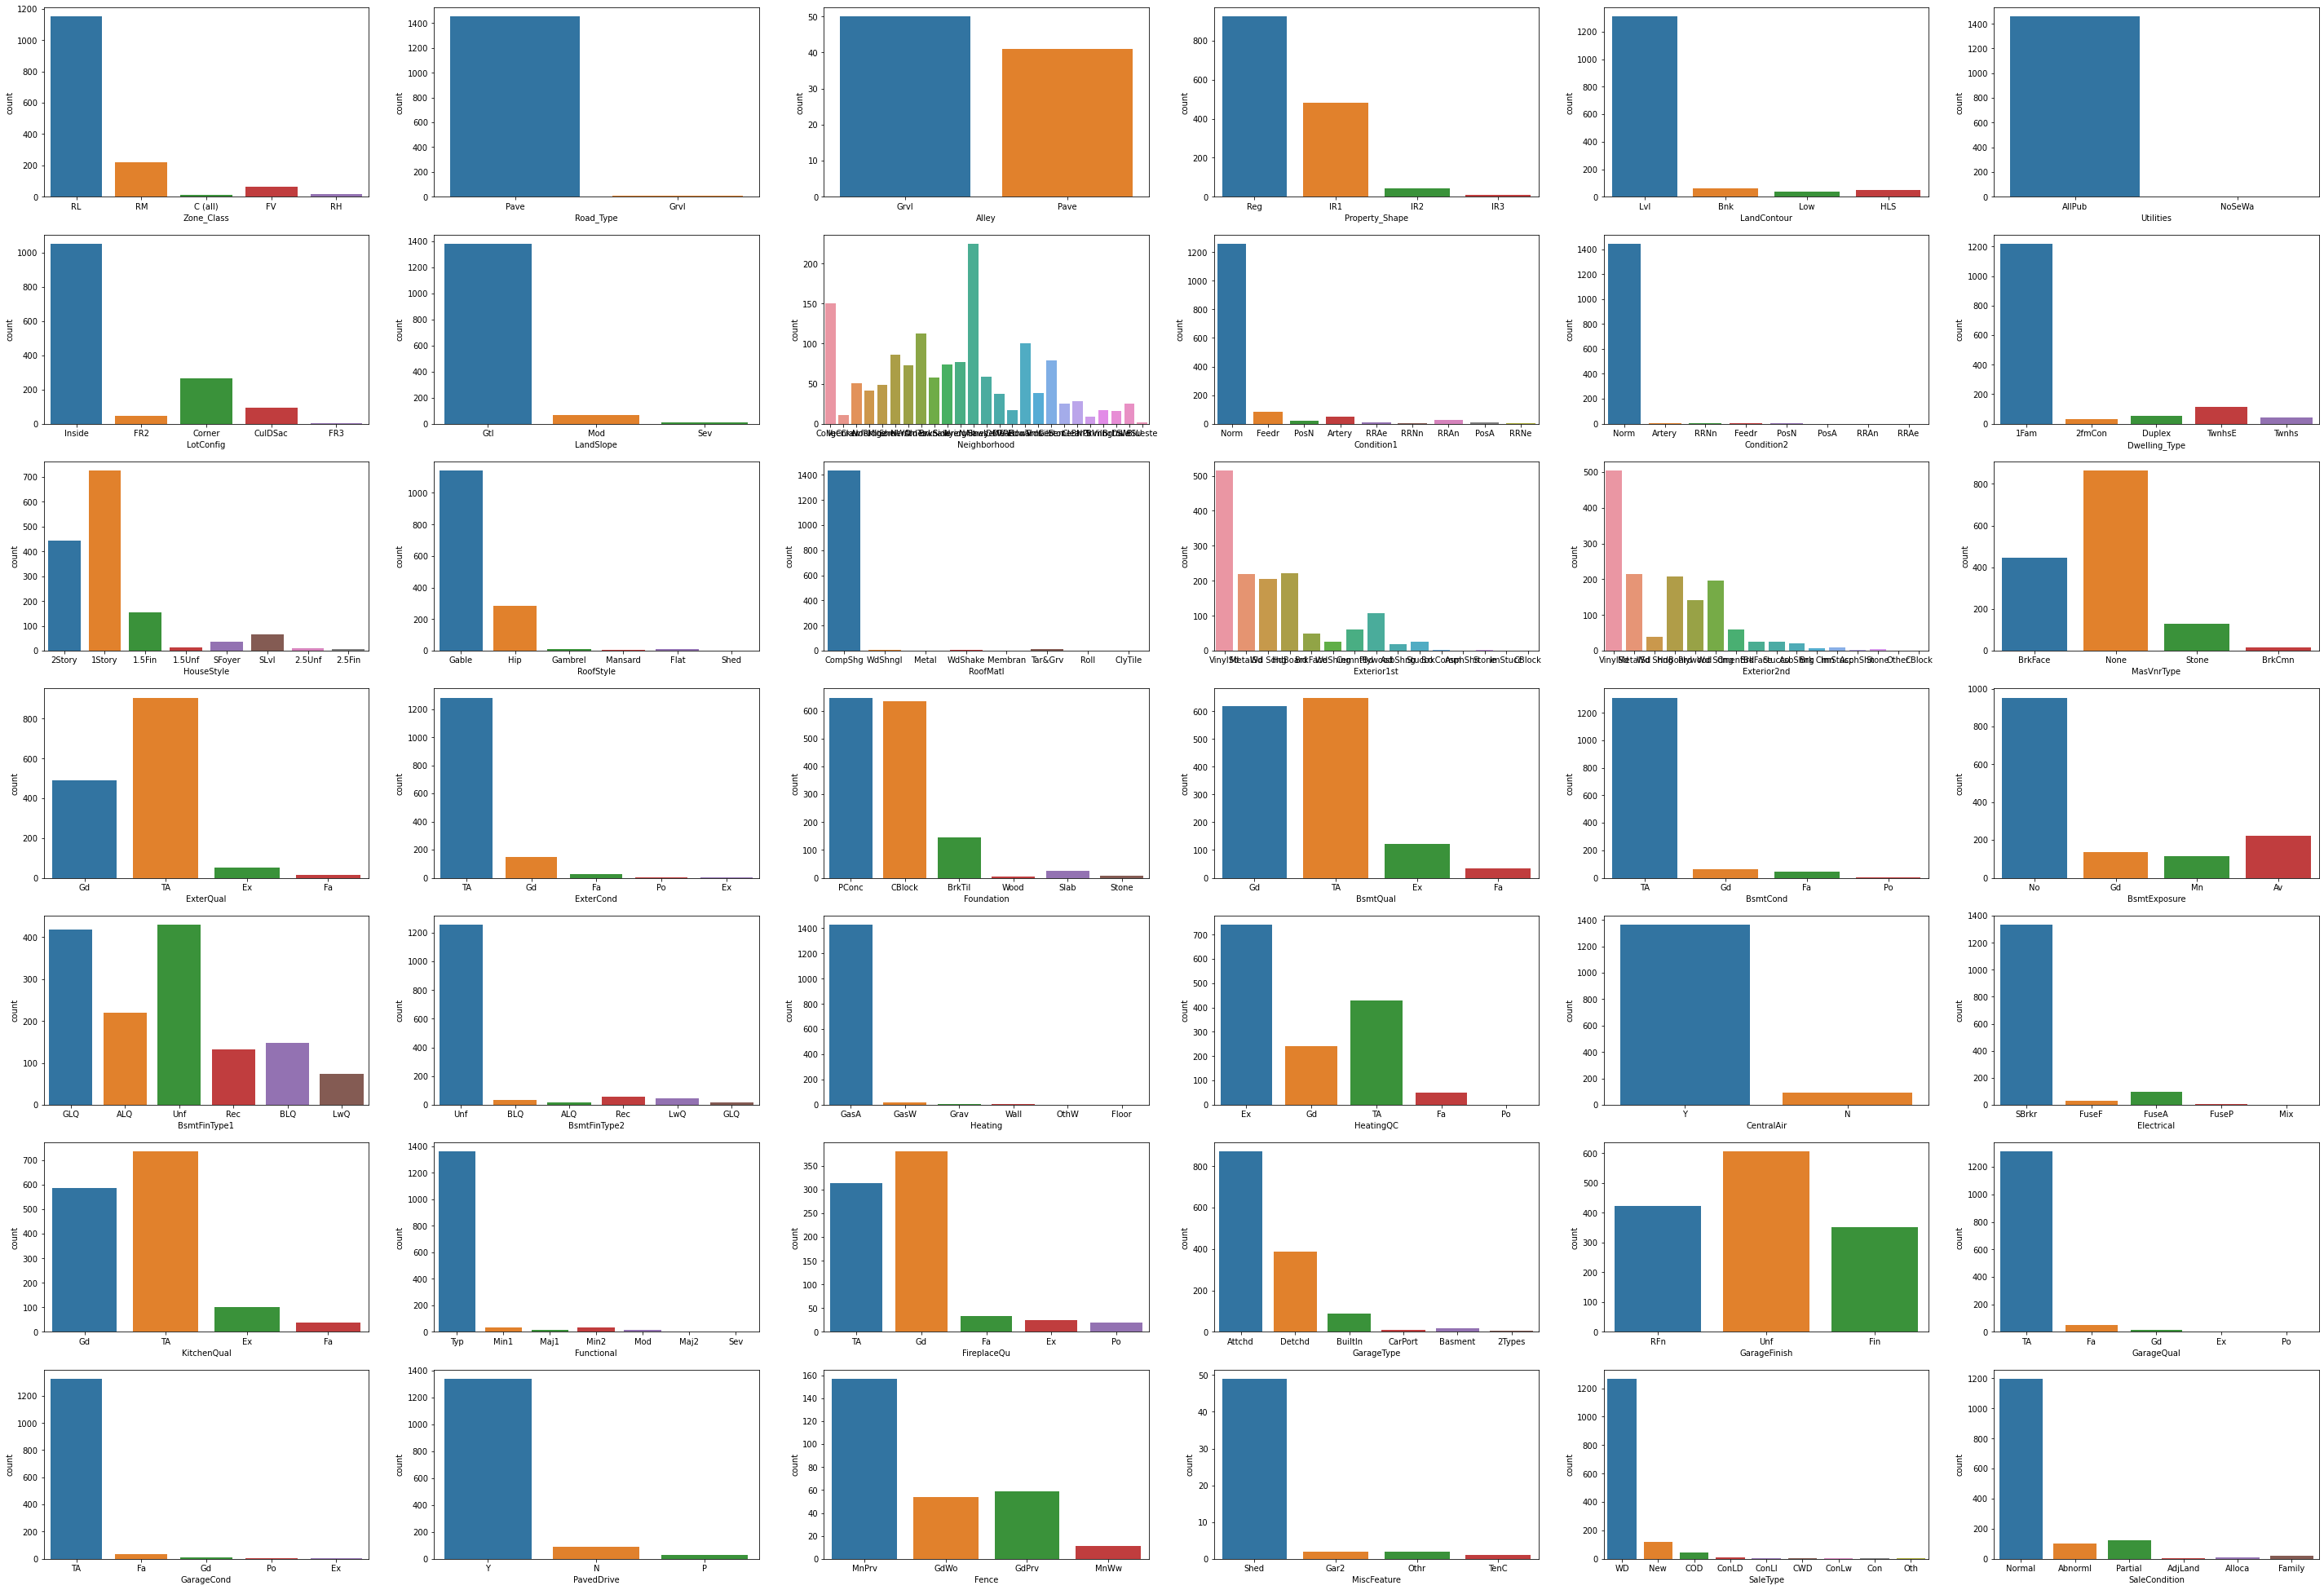

In [14]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_house:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_house[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(7, 6, figsize = (50, 35))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_house[variable], ax = subplot)
    
# display the plot
plt.show()

#### Boxplot of OverallQuality and Property_Sale_Price

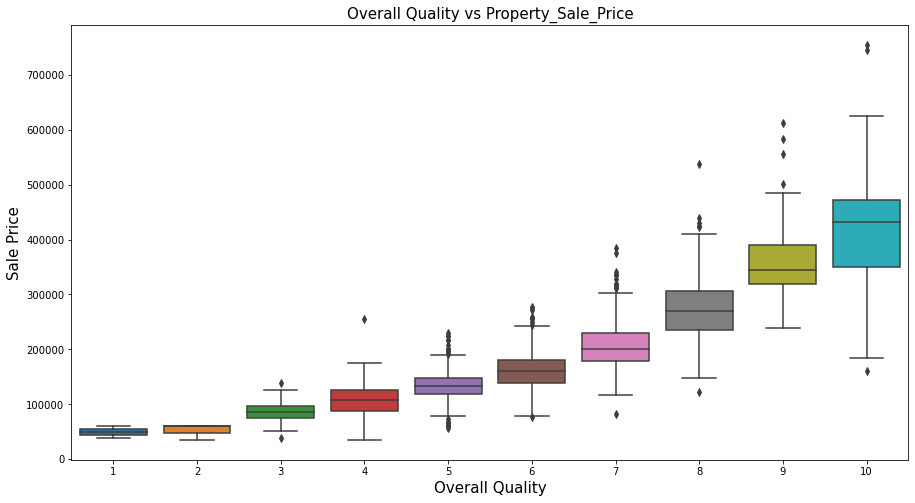

In [15]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallQual", data= df_house)

# set the title of the plot and the fontsize
plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Quality", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

#### Boxplot of Overall Condition and Property_Sale_Price

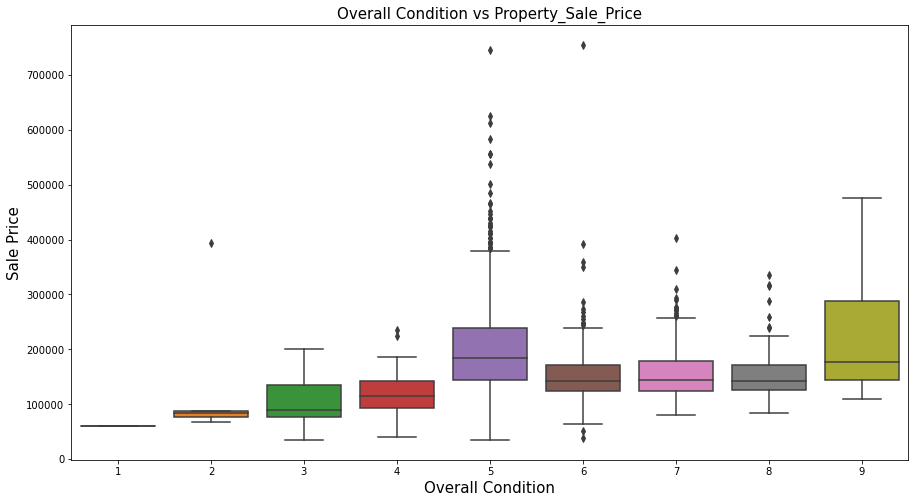

In [16]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df_house)

# set the title of the plot and the fontsize
plt.title("Overall Condition vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Condition", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

#### Draw the pairplot of the numeric variables

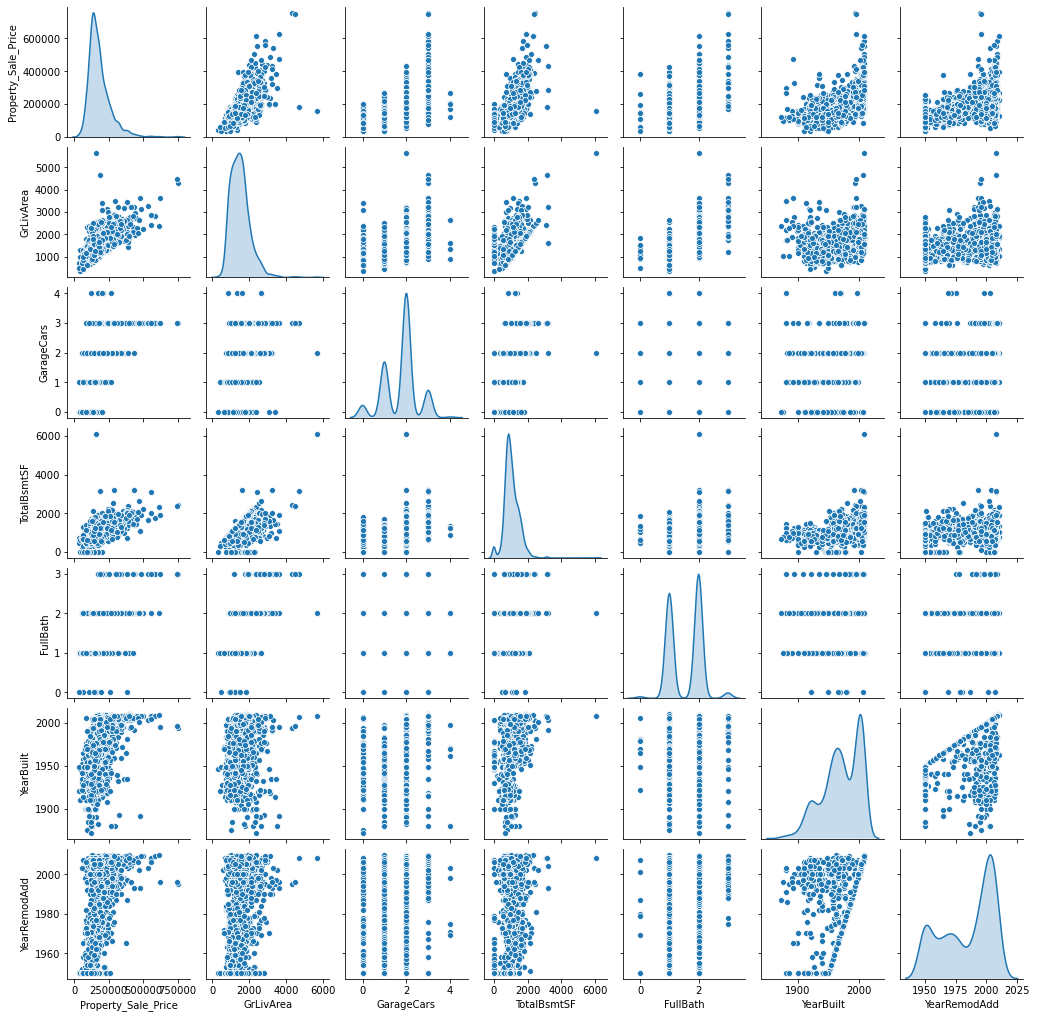

In [17]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df_house[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

<a id='outlier'></a>
### 4.1.4 Outliers Discovery

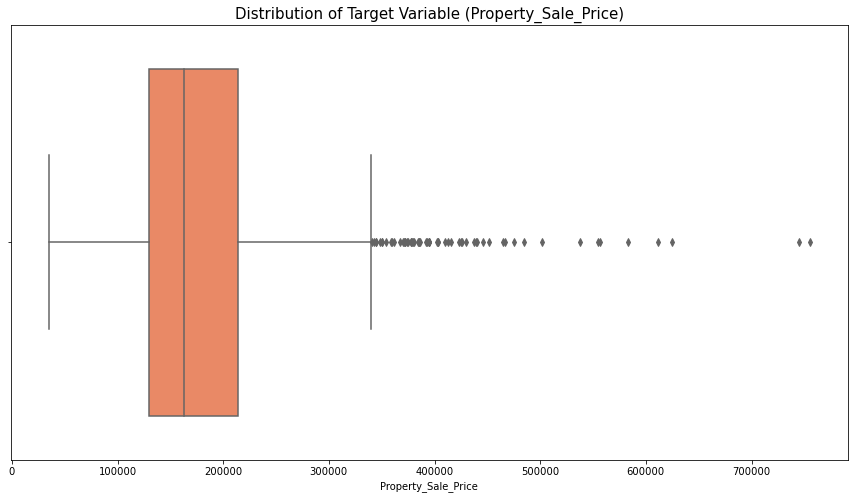

In [18]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df_house['Property_Sale_Price'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

The above plot shows that there are extreme observations in the target variable. As these values can affect the prediction of the regression model, we remove such observations before building the model.

In [19]:
# remove the observations with the house price greater than or equal to 500000
# consider all the observations with the Property_Sale_Price less than 500000
df_house = df_house[df_house['Property_Sale_Price'] < 500000]

# check the dimension of the data
df_house.shape

(1451, 78)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The number of observations is reduced to 1451 from 1460 which suggests that we have removed the 9 observations with extremely high house price.
                    </b>   
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Missing_Values'></a>
### 4.1.5 Missing Values

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column.<br><br>
                        <ol type="1"><li>Check the missing values</li>
                            <li>Visualize missing values using heatmap</li>
                            <li>Handle missing values
                            <ul type="i">
                                <li>For numeric variables</li>
                                <li> For categoric variables</li>
                            </ul>
                        </ol>  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check the missing values**

In [20]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_house.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_house.isnull().sum()*100/df_house.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df_house[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
MiscFeature,1397,96.278429,object
Alley,1360,93.728463,object
Fence,1171,80.702963,object
FireplaceQu,690,47.553411,object
LotFrontage,259,17.849759,float64
GarageCond,81,5.582357,object
GarageType,81,5.582357,object
GarageYrBlt,81,5.582357,float64
GarageFinish,81,5.582357,object
GarageQual,81,5.582357,object


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The variables 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', and 'Electrical' contains the missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Visualize missing values using heatmap**

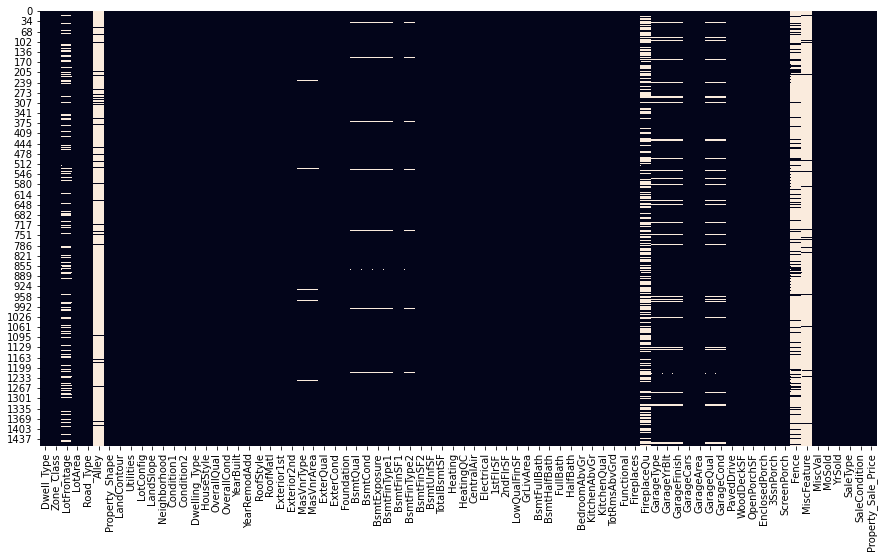

In [21]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df_house.isnull(), cbar=False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values. This is a visual representation of the previous output.

**3. Handle missing values**

**Replace the missing values in numerical variables**

In [22]:
# consider the numeric variables with missing values
# pass the condition to filter the variables with number of missing values greater than zero and numeric data type
num_missing_values = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] != 'object')]
num_missing_values

,Total,Percentage of Missing Values,Type
LotFrontage,259,17.849759,float64
GarageYrBlt,81,5.582357,float64
MasVnrArea,8,0.551344,float64


For the numerical variables, replace the missing values by their respective mean, median or mode as per the requirement.

In [23]:
# the variable 'LotFrontage' is positively skewed
# fill the missing values with its median value using fillna()
df_house['LotFrontage'] = df_house['LotFrontage'].fillna(df_house['LotFrontage'].median())

The dataframe `missing_data` shows that, all the variables containing the garage information have 81 missing values. This indicates that there are 81 observations for which garage facility is not available. Thus, we replace the missing values in the numeric variable `GarageYrBlt` by 0.

In [24]:
# replace missing values in 'GarageYrBlt' with 0 using fillna() 
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].fillna(0)

In [25]:
# the variable 'MasVnrArea' is positively skewed
# fill the missing values with its median value using fillna()
df_house['MasVnrArea'] = df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].median())

**Replace the missing values in categorical variables**

In [26]:
# consider the categoric variables with missing values
# pass the condition to filter the variables with number of missing values greater than zero and categoric data type
cat_missing_values = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] == 'object')]
cat_missing_values

,Total,Percentage of Missing Values,Type
MiscFeature,1397,96.278429,object
Alley,1360,93.728463,object
Fence,1171,80.702963,object
FireplaceQu,690,47.553411,object
GarageCond,81,5.582357,object
GarageType,81,5.582357,object
GarageFinish,81,5.582357,object
GarageQual,81,5.582357,object
BsmtFinType2,38,2.618884,object
BsmtExposure,38,2.618884,object


In [27]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'MiscFeature' with a valid value, 'None'
df_house['MiscFeature'] = df_house['MiscFeature'].fillna('None')

In [28]:
# according to the data definition, 'NA' denotes the absence of alley access
# replace NA values in 'Alley' with a valid value, 'No alley access' 
df_house['Alley'] = df_house['Alley'].fillna('No alley access')

In [29]:
# according to the data definition, 'NA' denotes the absence of fence
# replace NA values in 'Fence' with a valid value, 'No Fence'
df_house['Fence'] = df_house['Fence'].fillna('No Fence')

In [30]:
# according to the data definition, 'NA' denotes the absence of fireplace
# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df_house['FireplaceQu'] = df_house['FireplaceQu'].fillna('No Fireplace')

The dataframe `missing_data` shows that, all the variables containing the garage information have 81 missing values. This indicates that there are 81 observations for which garage facility is not available. Thus, we replace the missing values in the categoric variables representing the garage by `No Garage`.

In [31]:
# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
# 'inplace = True' replace the null values in the original data
for col in ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']:
    df_house[col].fillna('No Garage', inplace = True)

In [32]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 'BsmtQual', 'BsmtCond', 
# 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
# use 'for loop' to replace NA values with 'No Basement' in these columns 
# 'inplace = True' replace the null values in the original data
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_house[col].fillna('No Basement', inplace = True)

In [33]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace NA values in 'MasVnrType' with a valid value, 'None'
df_house['MasVnrType'] = df_house['MasVnrType'].fillna('None')

In [34]:
# replace the null values in 'Electrical' with its mode
# calculate the mode of the 'Electrical'
mode_electrical = df_house['Electrical'].mode()

# print mode of the 'Electrical'
print(mode_electrical)

0    SBrkr
dtype: object


In [35]:
# replace NA values in 'Electrical' with its mode, i.e. 'SBrkr'
df_house['Electrical'].fillna('SBrkr' , inplace = True)

After replacing the null values for the required variables, recheck the null values. 

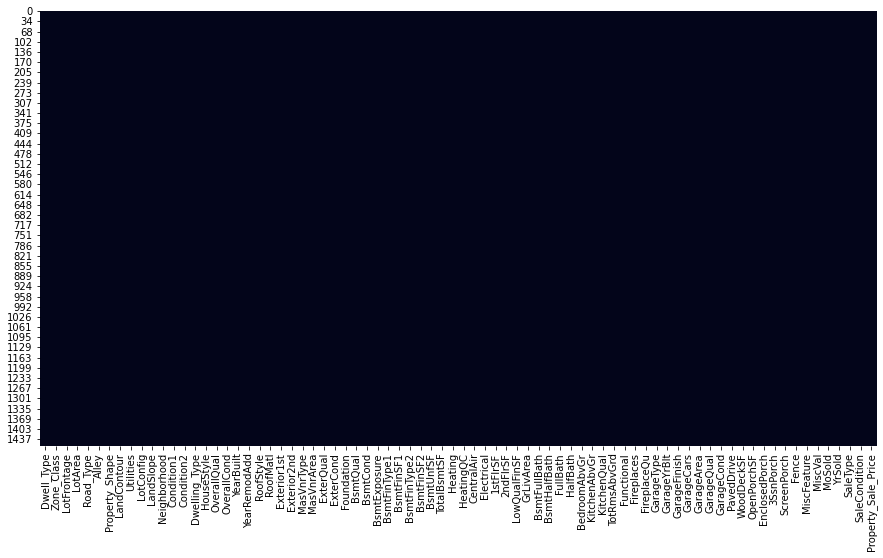

In [36]:
# recheck the null values
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df_house.isnull(), cbar=False)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that there are no missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='correlation'></a>
### 4.1.6 Study correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute a correlation matrix**

In [37]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_house.corr()

# print the correlation matrix
corrmat

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.359948,-0.140842,0.036824,-0.060231,0.029901,0.042606,0.028596,-0.065768,-0.064352,-0.142594,-0.239002,-0.252503,0.311621,0.046332,0.079566,0.005460,-0.002919,0.134347,0.177671,-0.026687,0.281667,0.044386,-0.043301,-0.080615,-0.037985,-0.096876,-0.014498,-0.005758,-0.012591,-0.044036,-0.025250,-0.007821,-0.014585,-0.019381,-0.085954
LotFrontage,-0.359948,1.000000,0.306226,0.218873,-0.050642,0.110575,0.078240,0.168580,0.201974,0.041758,0.122341,0.351744,0.403928,0.055154,0.038892,0.352795,0.087810,-0.009650,0.166976,0.039602,0.233933,-0.003219,0.311321,0.223229,0.097975,0.261254,0.317880,0.073205,0.133322,0.013371,0.063617,0.035947,0.000464,0.015944,0.009395,0.318744
LotArea,-0.140842,0.306226,1.000000,0.092573,-0.002507,0.007052,0.007963,0.079576,0.204725,0.113638,-0.002229,0.253819,0.293575,0.033593,0.005727,0.248741,0.154564,0.047356,0.111174,0.006873,0.114221,-0.016372,0.175347,0.268811,0.071133,0.145224,0.171107,0.159650,0.084143,-0.015829,0.021493,0.032825,0.039093,0.003327,-0.016991,0.252156
OverallQual,0.036824,0.218873,0.092573,1.000000,-0.087809,0.569569,0.549306,0.389042,0.216929,-0.062754,0.309207,0.519780,0.456487,0.281649,-0.029207,0.577533,0.106587,-0.045858,0.539019,0.268238,0.097513,-0.184125,0.407980,0.386322,0.289973,0.592229,0.552794,0.234836,0.307595,-0.110743,0.032642,0.055887,-0.030682,0.081077,-0.029227,0.802424
OverallCond,-0.060231,-0.050642,-0.002507,-0.087809,1.000000,-0.374705,0.076615,-0.125842,-0.041916,0.040844,-0.137000,-0.168898,-0.141383,0.032440,0.025204,-0.075899,-0.053159,0.116845,-0.192336,-0.059294,0.013622,-0.087629,-0.052043,-0.021176,-0.005742,-0.183182,-0.148636,-0.002397,-0.031102,0.069509,0.025223,0.058424,0.068605,-0.004147,0.045267,-0.072195
YearBuilt,0.029901,0.110575,0.007052,0.569569,-0.374705,1.000000,0.590358,0.308832,0.242388,-0.050381,0.147484,0.385072,0.272635,0.002106,-0.183659,0.188173,0.185755,-0.039128,0.464424,0.239822,-0.073171,-0.174064,0.081196,0.140979,0.271118,0.533519,0.474181,0.223873,0.186221,-0.386450,0.032225,-0.057585,-0.033934,0.016370,-0.016129,0.543898
YearRemodAdd,0.042606,0.078240,0.007963,0.549306,0.076615,0.590358,1.000000,0.170015,0.120246,-0.069146,0.179966,0.284008,0.232100,0.136997,-0.061920,0.283858,0.117521,-0.012512,0.436448,0.180804,-0.041872,-0.148847,0.181722,0.106649,0.145115,0.416036,0.366411,0.205597,0.224186,-0.192517,0.046070,-0.045230,-0.009821,0.025102,0.033392,0.531708
MasVnrArea,0.028596,0.168580,0.079576,0.389042,-0.125842,0.308832,0.170015,1.000000,0.237426,-0.070851,0.116437,0.340365,0.318259,0.150374,-0.069527,0.358948,0.078313,0.015343,0.251721,0.192394,0.099591,-0.036336,0.254011,0.238226,0.133385,0.351166,0.357034,0.145807,0.122038,-0.108352,0.022121,0.057424,-0.029244,0.005738,-0.010231,0.436515
BsmtFinSF1,-0.065768,0.201974,0.204725,0.216929,-0.041916,0.242388,0.120246,0.237426,1.000000,-0.054443,-0.502348,0.506796,0.427145,-0.160550,-0.064339,0.177440,0.652108,0.065858,0.039019,-0.003163,-0.108698,-0.080020,0.016513,0.245847,0.114548,0.209144,0.283615,0.202566,0.112177,-0.099877,0.028548,0.057946,0.004795,-0.010615,0.008691,0.357076
BsmtFinSF2,-0.064352,0.041758,0.113638,-0.062754,0.040844,-0.050381,-0.069146,-0.070851,-0.054443,1.000000,-0.211681,0.101582,0.096551,-0.096758,0.014921,-0.008304,0.158017,0.072546,-0.076080,-0.029227,-0.012647,-0.040788,-0.036589,0.044752,0.035023,-0.039581,-0.017447,0.071761,0.003118,0.036869,-0.030038,0.085238,0.005002,-0.014359,0.030290,-0.014028


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a heatmap.

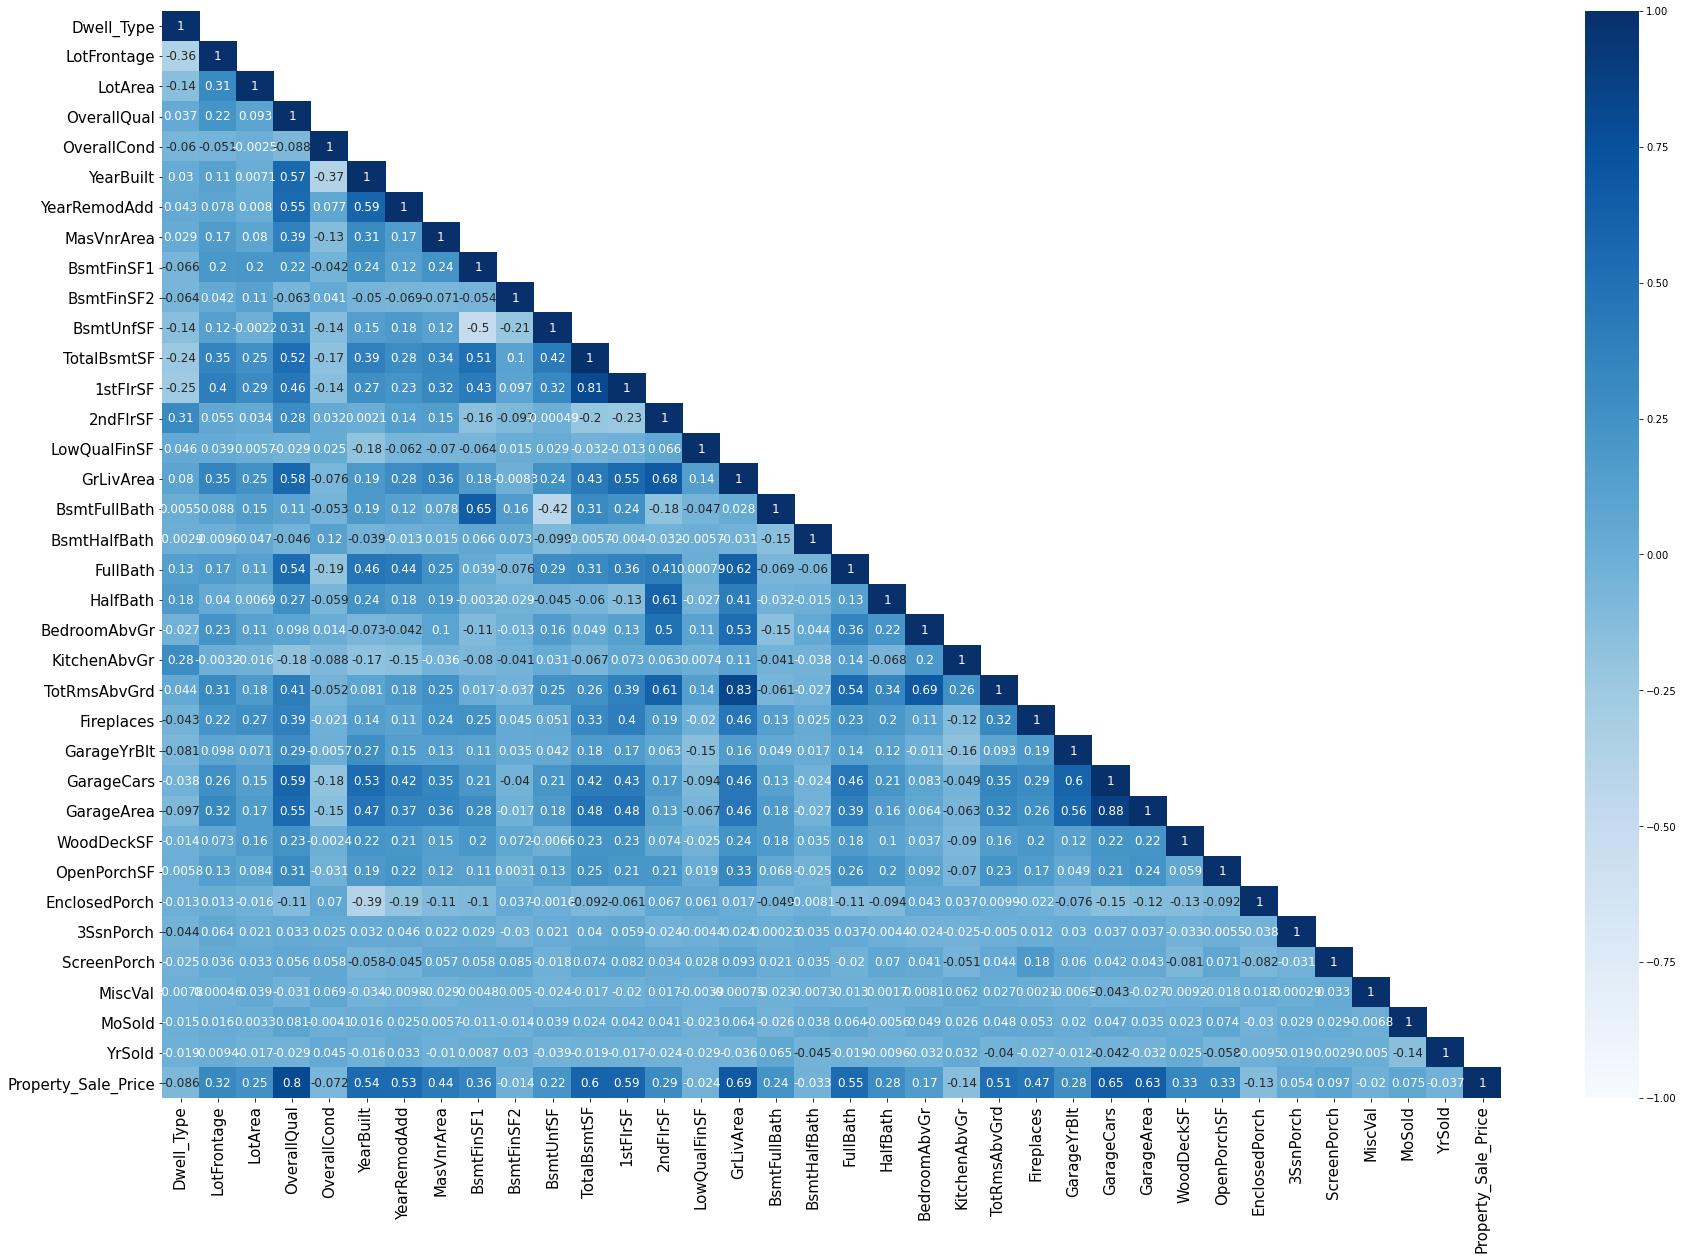

In [38]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

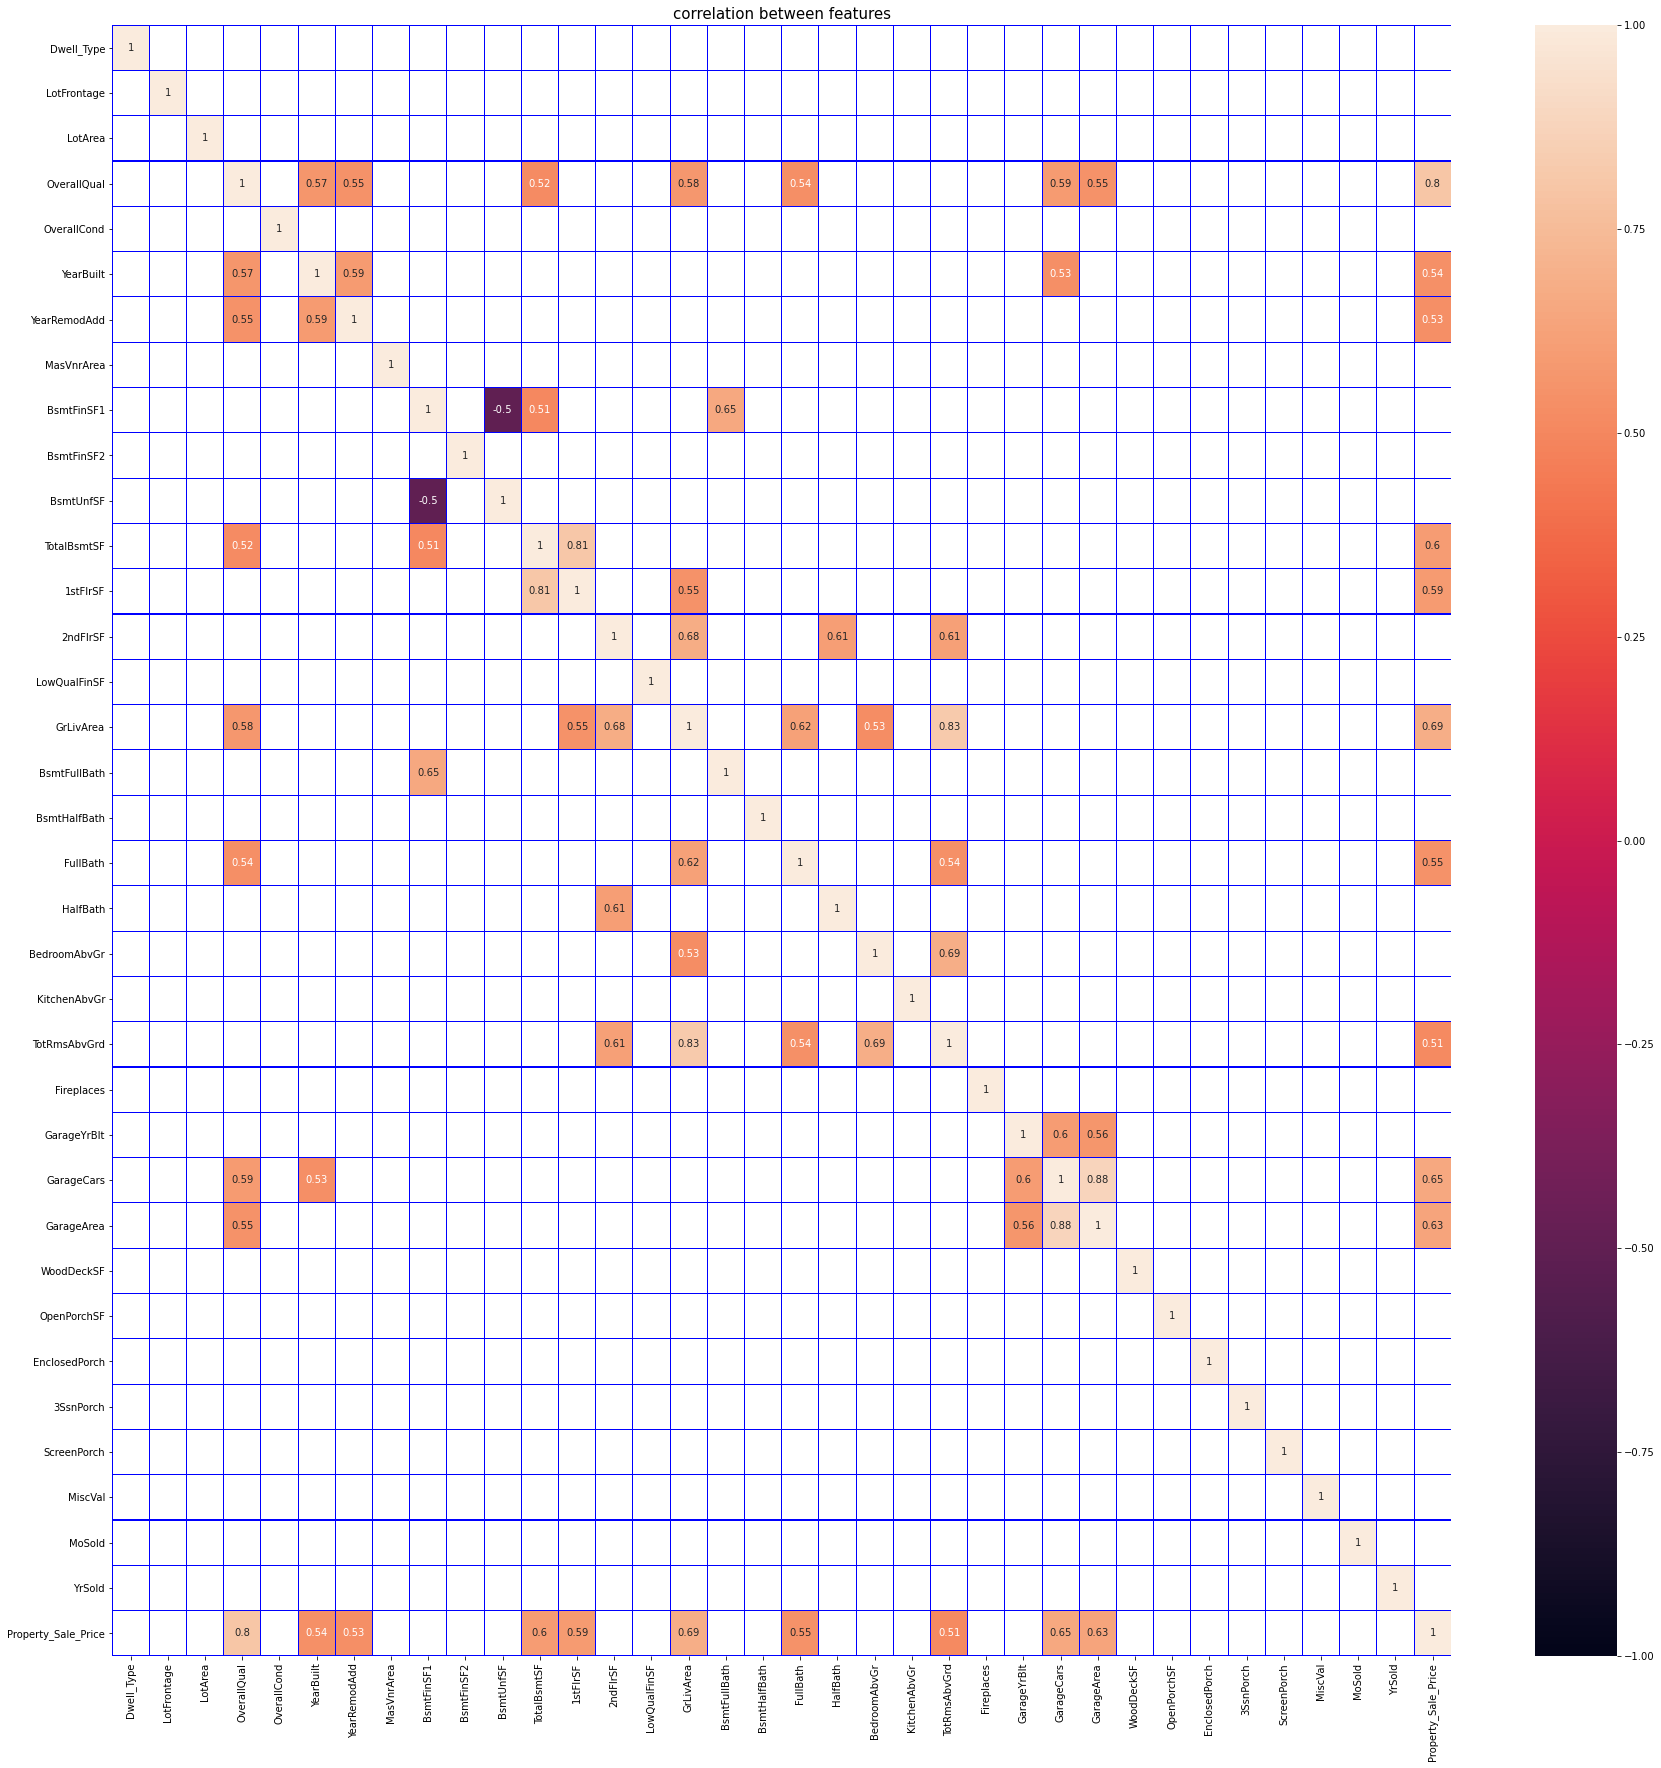

In [39]:
correlation=df_house.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation[(correlation>=0.5)|(correlation<=-0.5)],
           annot=True,linewidths=.1,linecolor="blue",vmax=1,vmin=-1)
plt.title('correlation between features',fontsize=15)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark blue squares represent the variables with strong positive correlation. <br><br>The above plot shows that there is highest positive correlation (= 0.88) between the variables 'GarageArea' and 'GarageCars'. Also there is strong positive correlation between the pairs (1StFlrSF, TotalBsmtSF) and (TotRmsAbvGrd, GrlivArea). These variables may involved in multicollinearity.<br>
                        No two variables have strong negative correlation in the dataset.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/2PBvA8T">Why correlation does not imply causation </a>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='cat_num'></a>
### 4.1.7 Analyze Relationships Between Target and Categorical Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the box-and-whisker plot for visualizing relationships between target and categorical variables.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

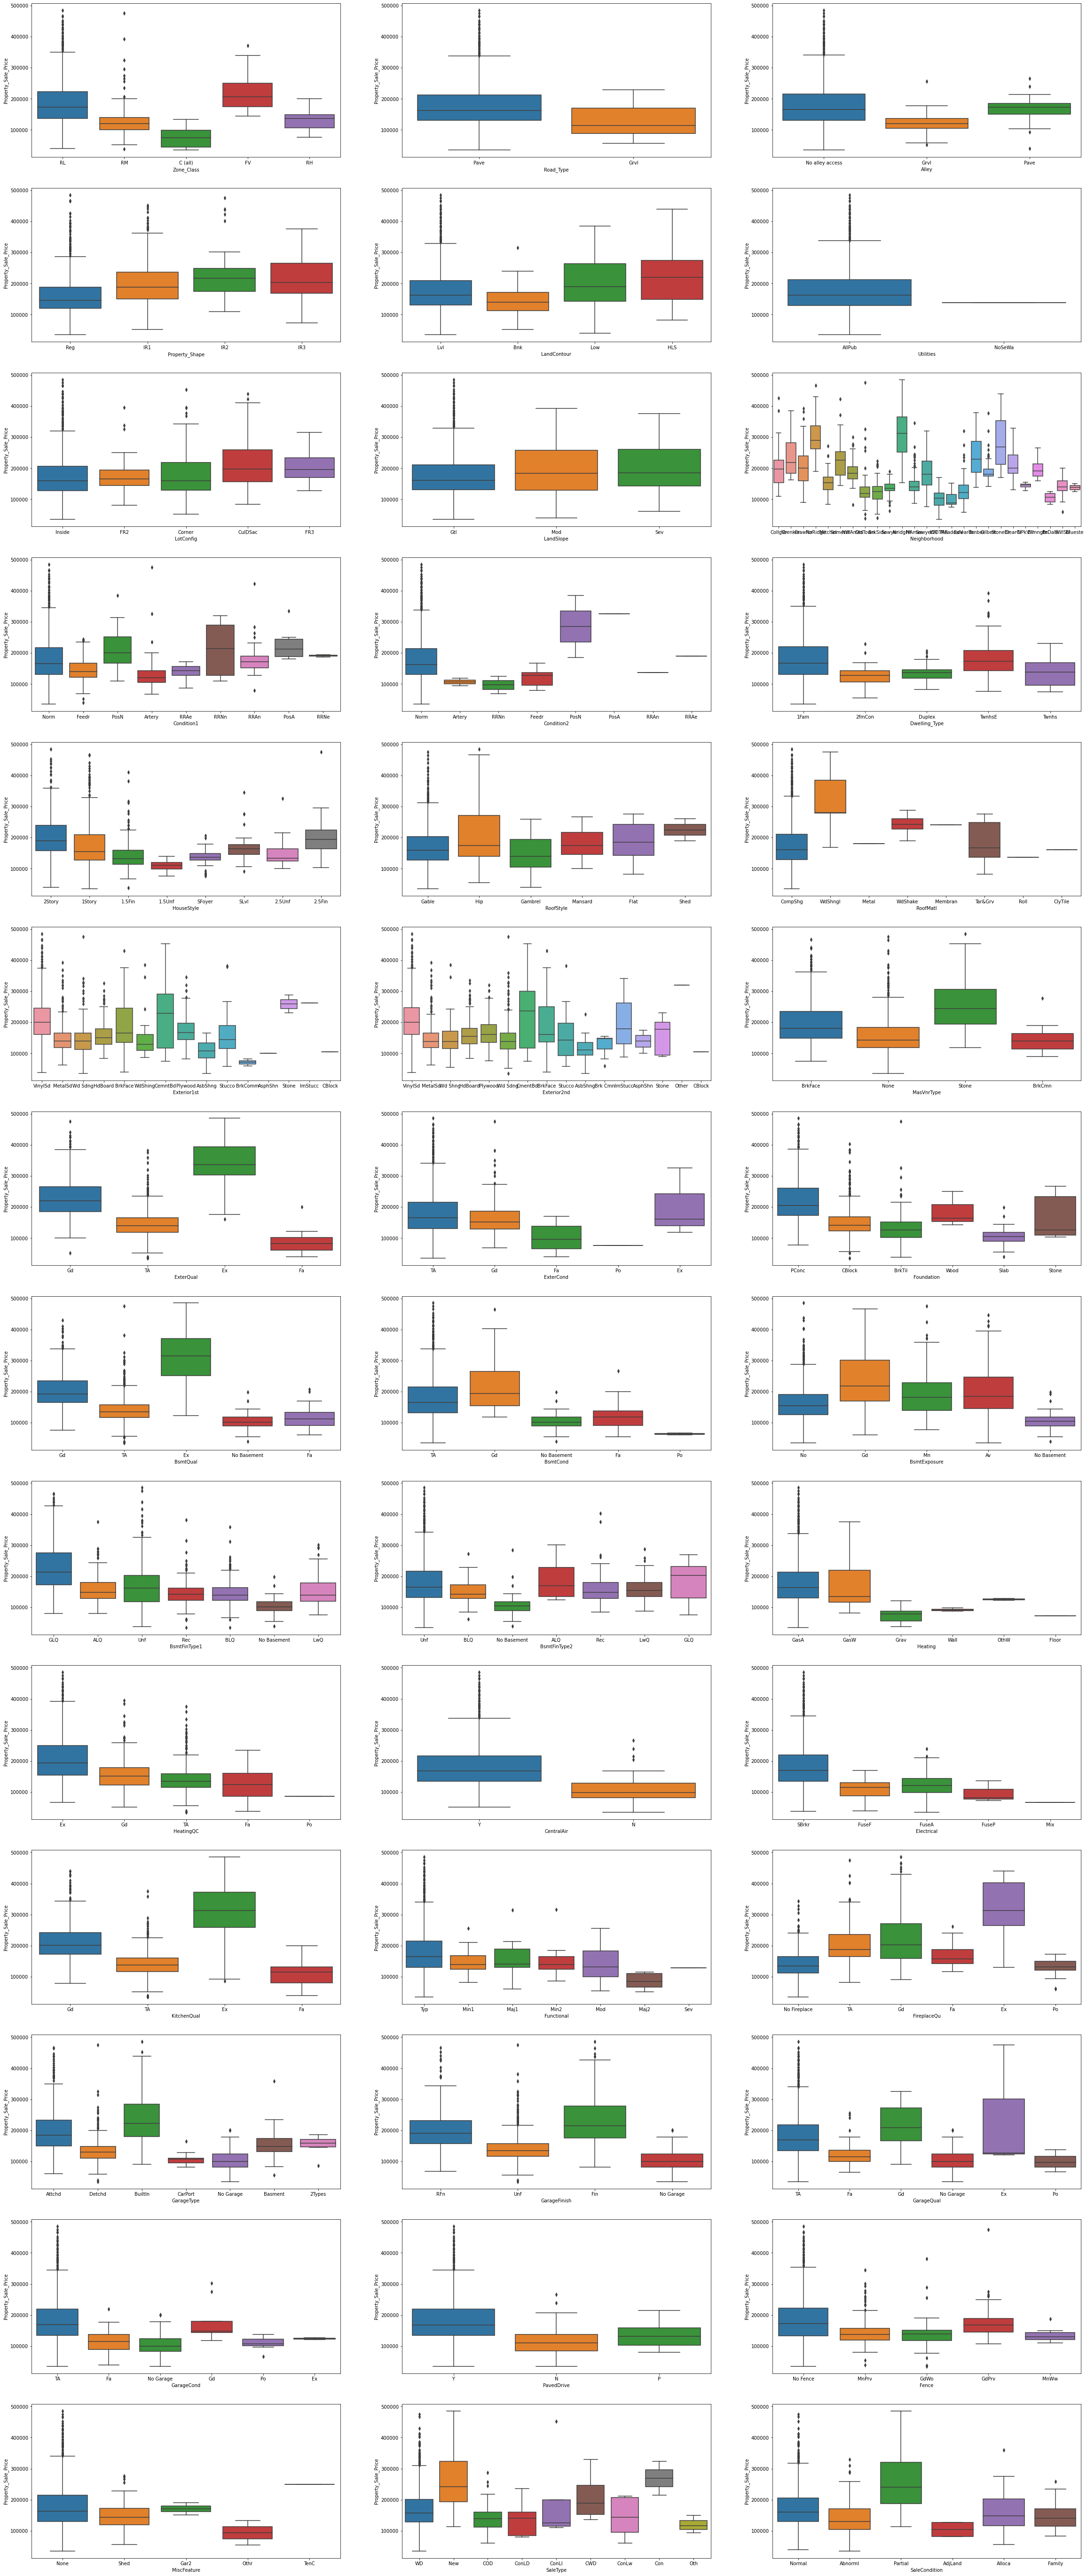

In [40]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_house:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_house[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the boxplot for each categorical and target variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# use for loop to plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df_house, ax = subplot)
    
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most of the categorical variables have impact on the selling price of the house. The median selling price is exponentially increasing with respect to the rating of the overall quality of the material used.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In order to check for normality of our target variable, <br><br>
                        1. Plot a histogram and also perform the Shapiro-Wilk test <br>
                        2. If the data is not normally distributed, use log transformation to get near normally distributed data <br>
                        3. Recheck for normality by plotting histogram and performing Shapiro-Wilk
                        test
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>




**1. Plot a histogram and also perform the Shapiro-Wilk test**

To plot a histogram, we use the `hist()` from the matplotlib library.

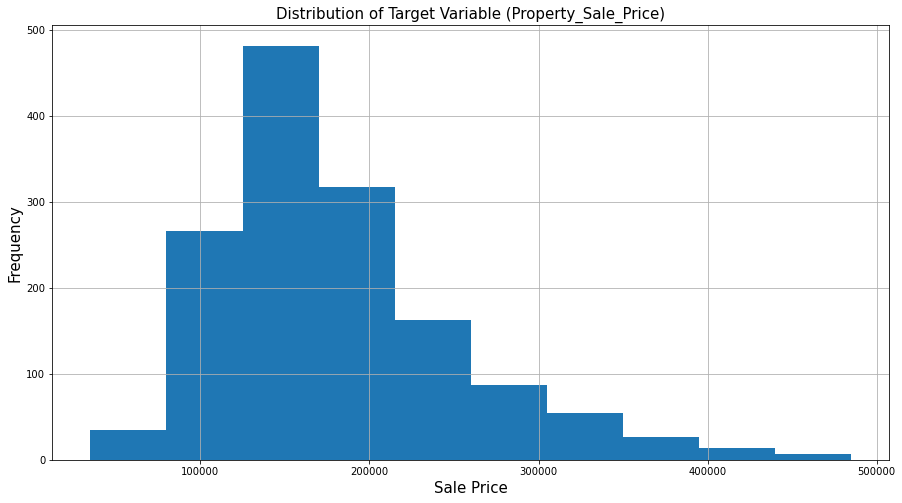

In [41]:
# check the distribution of target variable
df_house.Property_Sale_Price.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the variable 'Property_Sale_Price' is right skewed and not normally distributed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows: <br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>: The data is normally distributed</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: The data is not normally distributed</strong> </p>

In [42]:
# normality test using shapiro()
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(df_house.Property_Sale_Price)

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.919, p-value=0.000
The data is not normally distributed (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.<br><br>
                        Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use `np.log()` to log transform the 'Property_Sale_Price' variable. We also store the transformed variable into our data frame with a new name, `log_Property_Sale_Price`.

In [43]:
# log transformation for normality using np.log()
df_house['log_Property_Sale_Price'] = np.log(df_house['Property_Sale_Price'])

# display first 5 rows of the data
df_house.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


**3. Recheck for normality by plotting histogram and performing Shapiro-Wilk test**

Let us first plot a histogram of `log_Property_Sale_Price`.

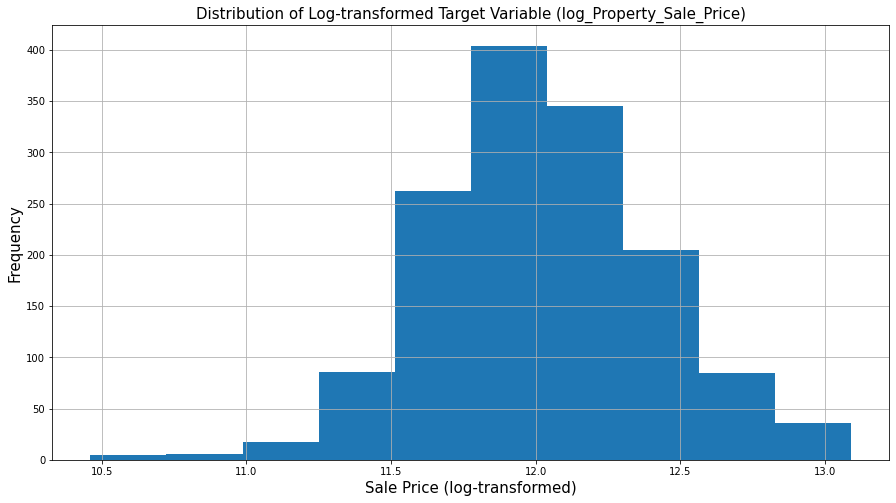

In [44]:
# recheck for normality 
# plot the histogram using hist
df_house.log_Property_Sale_Price.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable log_Property_Sale_Price is near normally distributed. However we again confirm by Shapiro-Wilk test.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform Shapiro-Wilk test.

In [45]:
# check the normality by Shapiro-Wilk test
# the test returns the the test statistics and the p-value of the test
statn, pv = shapiro(df_house['log_Property_Sale_Price'])

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.992, p-value=0.000
The data is not normally distributed (reject H0)


In [46]:
# find the skewness of the variable log_Property_Sale_Price
df_house['log_Property_Sale_Price'].skew()

-0.03836503763294778

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dummy'></a>
### 4.2.2 Dummy Encode the Categorical Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We need to perform dummy encoding on our categorical variables before we proceed; since the method of OLS works only on the numeric data. <br><br>
                    In order to dummy encode, we do the following: <br>
                    1. Filter numerical and categorical variables<br>
                    2. Dummy encode the catergorical variables<br>
                    3. Concatenate numerical and dummy encoded categorical variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter numerical and categorical variables**

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

In [ ]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

**2. Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_house_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_house_dummy.head()

In [ ]:
# check the shape of the dataframe
df_house_dummy.shape

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the dummy coded variables. <br><br>
                        Note: The categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/36nZQKg">1. FAQ: What is Dummy Coding? <br>
                    <a href="https://bit.ly/2q9Omt9">2. Encoding Categorical Features
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now proceed to train models. We shall begin by fitting a linear regression model using the method of ordinary least square(OLS). </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='LinearRegression'></a>
# 5. Linear Regression (OLS)

<a id='withLog'></a>
## 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br><br>
                       1. Split the data into training and test sets<br>
                       2. Build model using sm.OLS().fit()<br>
                       3. Predict the values using test set <br>
                       4. Compute accuracy measures <br>
                       5. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data into training and test sets**

Statmodels linear regression function (OLS) does not include the intercept term by default. Thus, we add the intercept column to the dataset.

In [ ]:
# add the intercept column using 'add_constant()'
df_house_dummy = sm.add_constant(df_house_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_house_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_house_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**2. Build model using sm.OLS().fit()**

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_withlog = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 94.9% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 1.955 and indicates that there is no autocorrelation. The Condition Number 3.23e+19 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data. <br><br>
                        Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.</b>     
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_withlog_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**4. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

**5. Tabulate the results**

In [ ]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_model_withlog_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_withlog_metrics, ignore_index = True)

# print the result table
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='withoutLog'></a>
## 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'Property_Sale_Price' variable as it is.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We do not need to do the train and test split again since it has been done while building the previous model<br><br>
                       In order to build the model, we do the following: <br>
                       1. Build model using sm.OLS().fit()<br>
                       2. Predict the values using test set <br>
                       3. Compute accuracy measures <br>
                       4. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build model using sm.OLS().fit()**

In [ ]:
# build a full model using OLS()
# consider the Property_Sale_Price as the target variable
# use fit() to fit the model on train data
linreg_full_model_withoutlog = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 94.4% of the variation in dependent variable Property_Sale_Price. The Durbin-Watson test statistics is 2.002 and indicates that there is no autocorrelation. The Condition Number 3.23e+19 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Predict the values using test set**

In [ ]:
# predict the 'Property_Sale_Price' using predict()
linreg_full_model_withoutlog_predictions = linreg_full_model_withoutlog.predict(X_test)

**3. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_Property_Sale_Price, linreg_full_model_withoutlog_predictions)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [ ]:
# append the result table 
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_full_model_withoutlog_rmse,
                                                 'R-Squared': linreg_full_model_withoutlog_rsquared,
                                                 'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_withoutlog_metrics, ignore_index = True)

# print the result table
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'Property_Sale_Price' is higher than the other model. However, the RMSE value of the model without considering the log transformation is considerably higher. So, we continue with variable 'log_Property_Sale_Price', instead of 'Property_Sale_Price'.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a linear regression full model by adding new features to the dataset. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Feature_Engineering'></a>
## 5.3 Feature Engineering

It is the process of creating new features using domain knowledge of the data that provides more insight into the data. Let us create a few features from the existing dataset and build a regression model on the newly created data.

<a id='feature1'></a>
### 5.3.1 Multiple Linear Regression (Using New Feature1) - Full Model (OLS)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br><br>
                       1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea' <br>
                       2. Split the data into train and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
                       4. Predict the values using test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'.**

**Calculate the complete area of the house.**<br>
Create a new variable `TotalSF` representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.

In [ ]:
# create a new variable 'TotalSF' using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'
# add the new variable to the dataframe 'df_house'
df_house['TotalSF'] = df_house['TotalBsmtSF'] + df_house['1stFlrSF'] + df_house['2ndFlrSF'] + df_house['GrLivArea']

# since we have added a new variable using the existing variables
# remove the existing variables in the data, 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' and 'GrLivArea'
# use 'drop()' to remove the variables
# 'axis = 1' drops the specific columns
df_house = df_house.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Build model using sm.OLS().fit()**

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_feature1 = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_feature1.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 94.9% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 1.955 and indicates that there is no autocorrelation. The Condition Number 1.26e+16 suggests that there is severe multicollinearity in the data. This condition number is higher than the condition number in the full model without feature engineering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_feature1_predictions = linreg_full_model_feature1.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_feature1_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_feature1_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_feature1_rsquared = linreg_full_model_feature1.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_feature1_rsquared_adj = linreg_full_model_feature1.rsquared_adj 

**6. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_feature1_metrics = pd.Series({'Model': "Linreg with new feature (TotalSF) ",
                                                'RMSE': linreg_full_model_feature1_rmse,
                                                'R-Squared': linreg_full_model_feature1_rsquared,
                                                'Adj. R-Squared': linreg_full_model_feature1_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_feature1_metrics, ignore_index = True)

# print the result table
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The R-squared value of the model with new feature is slightly less than the R-squared value for linreg model with log_Property_Sale_Price. RMSE and adjusted R-squared of the model is slightly increased by introducing a new feature.  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='feature2'></a>
### 5.3.2 Multiple Linear Regression (Using New Feature2) - Full Model (OLS)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br><br>
                       1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age' <br>
                       2. Split the data into train and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
                       4. Predict the values using test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age'**

In [ ]:
# 'datetime' is used to perform date and time operations
import datetime as dt

# 'now().year' gives the current year
# store the year as 'current_year'
current_year = int(dt.datetime.now().year)

In [ ]:
# create 2 new variables 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - df_house.YearBuilt
Remodel_age = current_year - df_house.YearRemodAdd

In [ ]:
# add the new variables to the dataframe
df_house['Buiding_age'] = Buiding_age
df_house['Remodel_age'] = Remodel_age

# since we have added a new variable using the existing variables
# remove the existing variables in the data, 'YearBuilt' and 'YearRemodAdd'
# use 'drop()' to remove the variables
# 'axis = 1' drops the specific columns
df_house = df_house.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Build model using sm.OLS().fit()**

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_feature2 = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_feature2.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 94.9% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 1.955 and indicates that there is no autocorrelation. The Condition Number 1.28e+16 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_feature2_predictions = linreg_full_model_feature2.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_feature2_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_feature2_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_feature2_rsquared = linreg_full_model_feature2.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_feature2_rsquared_adj = linreg_full_model_feature2.rsquared_adj 

**6. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_feature2_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_full_model_feature2_rmse,
                                                'R-Squared': linreg_full_model_feature2_rsquared,
                                                'Adj. R-Squared': linreg_full_model_feature2_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_feature2_metrics, ignore_index = True)

# print the result table
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>RMSE of the model with new features 'Building_age' and 'Remodel_age' is increased. The value of R-squared and aadjusted R-squared is same as the previous model.  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='feature_selection'></a>
# 6. Feature Selection

<a id='vif'></a>
## 6.1 Variance Inflation Factor

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate the VIF of the numerical independent variables. VIF for the variable V<sub>i</sub> is given as:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
Where, R-squared is the R-squared of the regression model build by regressing one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i).

In [ ]:
# consider the independent variables in the dataframe 'df_house' 
# use 'drop()' to remove the target variables 'Property_Sale_Price' and 'log_Property_Sale_Price'
# 'axis = 1' drops the specific columns
df_house_features = df_house.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)

# filter the numerical features in the dataset
df_numeric_features_vif = df_house_features.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

#### Calculate the VIF for each numeric variable.

In [ ]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The output shows that the variable 'YrSold' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above dataframe contains all the variables with VIF less than 10. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br><br>
                       1. Concatenate numerical and dummy encoded categorical variables  <br>
                       2. Split the data into train and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
                       4. Predict the values using test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now, let us build the model using the categorical variables and the numerical variables obtained from VIF. 

**1. Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# consider the variables obtained from VIF
# concatenate the numerical and dummy encoded categorical variables using concat()
# use the dummy encoded categorical variables obtained in section 5.3.4
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy.copy()

# extract the target variable from the data set
y = df_house[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Build model using sm.OLS().fit()**

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_vif = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_vif.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 92.4% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 1.919 and indicates that there is no autocorrelation. The Condition Number 1.00e+20 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_vif_predictions = linreg_full_model_vif.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_vif_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_vif_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_vif_rsquared = linreg_full_model_vif.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_vif_rsquared_adj = linreg_full_model_vif.rsquared_adj 

**6. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_vif_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_full_model_vif_rmse,
                                                'R-Squared': linreg_full_model_vif_rsquared,
                                                'Adj. R-Squared': linreg_full_model_vif_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_vif_metrics, ignore_index = True)

# print the result table
result_tabulation

<a id='forward'></a>
## 6.2 Forward Selection

This method considers the null model (model with no predictors) in the first step. In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved. The variable is added based on its correlation with the target variable. Such a variable has the least p-value in the model.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to select the features using forward selection method, we do the following: <br><br>
                       1. Concatenate numerical and dummy encoded categorical variables  <br>
                       2. Split the data into train and test sets<br>
                       3. Find best features using forward selection method<br>
                       4. Build the model on the features obtained in step 3 using sm.OLS().fit()<br>
                       5. Predict the values using test set <br>
                       6. Compute accuracy measures <br>
                       7. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Find best features using forward selection method**

Consider the 'log_Property_Sale_Price' as the target variable.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
# 'n_jobs = -1' considers all the CPUs in the system to select the feattures
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

# fit the step forward selection on training data using fit()
# consider the log of sales price as the target variable
sfs_forward = linreg_forward.fit(X_train, y_train['log_Property_Sale_Price'])

In [ ]:
# print the number of selected features
print('Number of features selected using forward selection method:', len(sfs_forward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using forward selection method are: ')
print(sfs_forward.k_feature_names_)

**4. Build the model on the features obtained in step 3 using sm.OLS().fit()**

The above list shows the features selected by forward selection method. We consider all the numeric features from the list. <br>
For categorical features, the list contains some of the categories of a categorical variable. Thus, we consider only the variables that have either all its categories in the above list or if majority of observations lie in the categories given above. To select such variables we refer to the countplot plotted in section 4.1.3

In [ ]:
df_house.columns

In [ ]:
abc = ['Dwell_Type', 'Zone_Class', 'Road_Type', 'LandContour', 'Neighborhood', 'HouseStyle',
                                         'OverallQual', 'OverallCond', 'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtCond', 
                                         'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                                         'GarageType', 'Fence', 'SaleType', 'SaleCondition']

for i in abc:
    print(i, i in df_house)

In [ ]:
# consider numeric features
df_numeric_features = df_house.loc[:, ['LotArea', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                       'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold',
                                       'TotalSF', 'Buiding_age', 'Remodel_age']]

# consider categoric features
df_categoric_features = df_house.loc[:, ['Dwell_Type', 'Zone_Class', 'Road_Type', 'LandContour', 'Neighborhood', 'HouseStyle',
                                         'OverallQual', 'OverallCond', 'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtCond', 
                                         'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                                         'GarageType', 'Fence', 'SaleType', 'SaleCondition']]

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

In [ ]:
df_dummy.shape

**Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# extract the target variable from the data set
y = df_house[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_forward, X_test_forward, y_train, y_test = train_test_split(df_dummy, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_forward is:", X_train_forward.shape)

# print dimension of predictors test set
print("The shape of X_test_forward is:",X_test_forward.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_forward = sm.OLS(y_train['log_Property_Sale_Price'], X_train_forward).fit()

# print the summary output
print(linreg_full_model_forward.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 91.6% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 2.019 and indicates that there is no autocorrelation. The Condition Number 1.30e+16 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_forward_predictions = linreg_full_model_forward.predict(X_test_forward)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_forward_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**6. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_forward_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_forward_rsquared = linreg_full_model_forward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_forward_rsquared_adj = linreg_full_model_forward.rsquared_adj 

**7. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_forward_metrics = pd.Series({'Model': "Linreg with Forward Selection",
                                                'RMSE': linreg_full_model_forward_rmse,
                                                'R-Squared': linreg_full_model_forward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_forward_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_forward_metrics, ignore_index = True)

# print the result table
result_tabulation

<a id="back"></a>
## 6.3 Backward Elimination

This method considers the full model (model with all the predictors) in the first step. In the next steps start removing one variable at each step until we run out of the independent variables or the stopping rule is achieved. The least significant variable (with the highest p-value) is removed at each step.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to select the features using backward elimination method, we do the following: <br><br>
                       1. Concatenate numerical and dummy encoded categorical variables  <br>
                       2. Split the data into train and test sets<br>
                       3. Find the best features using backward selection method<br>
                       4. Build the model on the features obtained in step 3 using sm.OLS().fit()<br>
                       5. Predict the values using test set <br>
                       6. Compute accuracy measures <br>
                       7. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Find the best features using backward elimination method**

Consider the 'log_Property_Sale_Price' as the target variable.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
# 'n_jobs = -1' considers all the CPUs in the system to select the feattures
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2', n_jobs = -1)

# fit the backward elimination on train data using fit()
# consider the log of sales price as the target variable
sfs_backward = linreg_backward.fit(X_train, y_train['log_Property_Sale_Price'])

In [ ]:
# print the number of selected features
print('Number of features selected using backward elimination method:', len(sfs_backward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using backward elimination method are: ')
print(sfs_backward.k_feature_names_)

**4. Build the model on the features obtained in step 3 using sm.OLS().fit()**

The above list shows the features selected by backward elimination method. We consider all the numeric features from the list. <br>
For categorical features, the list contains some of the categories of a categorical variable. Thus, we consider only the variables that have either all its categories in the above list or if majority of observations lie in the categories given above. To select such variables we refer to the countplot plotted in section 4.1.3

In [ ]:
# consider numeric features
df_numeric_features = df_house.loc[:, ['LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                                       'Remodel_age']]

# consider categoric features
df_categoric_features = df_house.loc[:, ['Dwell_Type', 'Zone_Class', 'LandContour', 'Neighborhood','OverallQual', 'OverallCond', 
                                         'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                         'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'Fence',
                                         'SaleType', 'SaleCondition']]

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

In [ ]:
df_dummy.shape

**Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# extract the target variable from the data set
y = df_house[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_backward, X_test_backward, y_train, y_test = train_test_split(df_dummy, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_backward is:", X_train_backward.shape)

# print dimension of predictors test set
print("The shape of X_test_backward is:",X_test_backward.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_backward = sm.OLS(y_train['log_Property_Sale_Price'], X_train_backward).fit()

# print the summary output
print(linreg_full_model_backward.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 89.0% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 2.005 and indicates that there is no autocorrelation. The Condition Number 1.30e+16 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_backward_predictions = linreg_full_model_backward.predict(X_test_backward)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_backward_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**6. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_backward_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_backward_rsquared = linreg_full_model_backward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_backward_rsquared_adj = linreg_full_model_backward.rsquared_adj 

**7. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_backward_metrics = pd.Series({'Model': "Linreg with Backward Elimination",
                                                'RMSE': linreg_full_model_backward_rmse,
                                                'R-Squared': linreg_full_model_backward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_backward_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_backward_metrics, ignore_index = True)

# print the result table
result_tabulation

<a id="rfe"></a>
## 6.4 Recursive Feature Elimination (RFE)

It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to select the features using RFE method, we do the following: <br><br>
                       1. Concatenate numerical and dummy encoded categorical variables  <br>
                       2. Split the data into train and test sets<br>
                       3. Find the best features using RFE method<br>
                       4. Build the model on the features obtained in step 3 using sm.OLS().fit()<br>
                       5. Predict the values using test set <br>
                       6. Compute accuracy measures <br>
                       7. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_house.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_house.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

**2. Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

**3. Find the best features using RFE method**

Consider the 'log_Property_Sale_Price' as the target variable.

In [ ]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = linreg_rfe)

# fit the RFE model on train data using fit()
# consider the log of sales price as the target variable
rfe_model = rfe_model.fit(X_train, y_train['log_Property_Sale_Price'])

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the number of selected features 
print('Number of features selected using RFE method:', len(signi_feat_rfe))

# print a blank line
print('\n')

# print the significant features obtained from RFE
print('Features selected using RFE method are:')
print(list(signi_feat_rfe))

**4. Build the model on the features obtained in step 3 using sm.OLS().fit()**

The above list shows the features selected by RFE method. We consider all the numeric features from the list. <br>
For categorical features, the list contains some of the categories of a categorical variable. Thus, we consider only the variables that have either all its categories in the above list or if majority of observations lie in the categories given above. To select such variables we refer to the countplot plotted in section 4.1.3

In [ ]:
# consider numeric features
df_numeric_features = df_house.loc[:, ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 
                                       'GarageCars']]

# consider categoric features
df_categoric_features = df_house.loc[:, ['Dwell_Type', 'Zone_Class', 'Road_Type', 'Neighborhood','OverallQual', 'OverallCond',
                                         'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'BsmtFinType1', 'Heating', 
                                         'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual',
                                         'GarageCond', 'SaleType', 'SaleCondition']]

**Dummy encode the catergorical variables**

In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

In [ ]:
df_dummy.shape

**Split the data into train and test sets**

In [ ]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# extract the target variable from the data set
y = df_house[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(df_dummy, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_rfe is:", X_train_rfe.shape)

# print dimension of predictors test set
print("The shape of X_test_rfe is:",X_test_rfe.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_rfe = sm.OLS(y_train['log_Property_Sale_Price'], X_train_rfe).fit()

# print the summary output
print(linreg_full_model_rfe.summary())

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 89.0% of the variation in dependent variable log_Property_Sale_Price. The Durbin-Watson test statistics is 1.995 and indicates that there is no autocorrelation. The Condition Number 1.27e+16 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [ ]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_rfe_predictions = linreg_full_model_rfe.predict(X_test_rfe)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [ ]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_rfe_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**6. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [ ]:
# calculate rmse using rmse()
linreg_full_model_rfe_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_rfe_rsquared = linreg_full_model_rfe.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_rfe_rsquared_adj = linreg_full_model_rfe.rsquared_adj 

**7. Tabulate the results**

In [ ]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_rfe_metrics = pd.Series({'Model': "Linreg with RFE",
                                                'RMSE': linreg_full_model_rfe_rmse,
                                                'R-Squared': linreg_full_model_rfe_rsquared,
                                                'Adj. R-Squared': linreg_full_model_rfe_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_rfe_metrics, ignore_index = True)

# print the result table
result_tabulation

<a id="conclusion"> </a>
# 7. Conclusion and Interpretation

To take the final conclusion, let us print the result table.

In [ ]:
# print the 'result_tabulation' to compare all the models
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The regression algorithms named in the above table have been implemented on the givn dataset. The performance of the models were evaluated using RMSE, R-squared and Adjusted R-squared values. <br><br>
                        The above result shows that the linear regression with forward selection method has the lowest RMSE value. Thus, it can be concluded that the linear regression model build on the features obtained from forward selection method can be used to predict the price of the house.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>